## Notebook for testing

In [3]:
## Import libraries

In [4]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [5]:
### read the data set

In [6]:
df = pd.read_csv('../data/train.csv')

In [7]:
df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [8]:
df.shape

(106800, 15)

In [9]:
df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
dtype: int64

### Target columns
---

- seizure_vote                            
- lpd_vote **(lpd: lateralized periodic discharges)**                               
- gpd_vote **(gpd: generalized periodic discharges)**                               
- lrda_vote **(lrd: lateralized rhythmic delta activity)**                           
- grda_vote **(grda: generalized rhythmic delta activity)**                         
- other_vote                              

### Testing columns
---

- spectrogram_id                           
- eeg_id                             
- patient_id                             

In [10]:
### Drop unnecessary columns

In [11]:
df.drop(columns = ['label_id'], inplace = True)

In [12]:
df.head(20)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,30539,GPD,0,0,5,0,1,5


In [13]:
list(df.expert_consensus.unique())

['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD']

### Neurological Outcomes

- Seizure
- GPD
- LRDA
- Other
- GRDA
- LPD

### Read the spectrogram files

In [14]:
path = '../data/train_spectrograms'

In [15]:
read_files=glob.glob(os.path.join(path,"*.parquet"))

In [16]:
read_files;

In [17]:
# Key function to extract the number part of the file name
def numeric_part(filename):
    return int(''.join(filter(str.isdigit, os.path.basename(filename))))

In [18]:
# Sorted file names from its basename
sorted_files = sorted(read_files, key=numeric_part)

In [19]:
sorted_files;

In [ ]:
df1 = [pd.read_parquet(sorted_files[i], engine='pyarrow') for i in range(len(sorted_files))]

In [21]:
df1.shape

(320, 401)

In [22]:
sorted_files[0]

'../data/train_spectrograms/353733.parquet'

In [23]:
df1

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
0,1,4.26,10.98,9.05,13.65,11.49,8.930000,18.840000,19.26,19.240000,...,0.31,0.17,0.28,0.19,0.24,0.27,0.29,0.16,0.22,0.19
1,3,2.65,3.97,12.18,13.26,14.21,13.230000,9.650000,8.11,11.280000,...,0.15,0.13,0.14,0.24,0.24,0.36,0.35,0.31,0.36,0.40
2,5,4.18,4.53,8.77,14.26,13.36,16.559999,19.219999,17.51,22.650000,...,0.29,0.21,0.16,0.25,0.28,0.28,0.34,0.48,0.44,0.48
3,7,2.41,3.21,4.92,8.07,5.97,12.420000,10.820000,14.96,21.809999,...,0.33,0.51,0.49,0.64,0.58,0.42,0.32,0.31,0.32,0.33
4,9,2.29,2.44,2.77,4.62,5.39,7.080000,9.840000,12.27,14.410000,...,0.44,0.38,0.48,0.63,0.45,0.45,0.49,0.33,0.31,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,631,6.36,6.59,6.60,7.30,4.48,8.400000,13.420000,13.85,16.010000,...,0.14,0.05,0.06,0.04,0.04,0.04,0.05,0.05,0.08,0.11
316,633,4.90,8.80,8.22,5.83,10.21,10.580000,10.250000,13.68,19.549999,...,0.16,0.08,0.06,0.06,0.07,0.04,0.06,0.09,0.07,0.08
317,635,6.07,7.85,11.26,9.20,8.18,9.130000,10.450000,15.09,23.020000,...,0.15,0.13,0.13,0.13,0.10,0.08,0.07,0.09,0.17,0.12
318,637,3.41,3.75,4.80,6.45,6.70,7.960000,8.160000,6.97,9.700000,...,0.13,0.11,0.13,0.07,0.11,0.12,0.09,0.16,0.19,0.19


In [32]:
# Assuming df1 is your DataFrame
mean_values = df1.mean()

# Creating a new DataFrame with mean values in a single row
data = [pd.DataFrame(mean_values, columns=[numeric_part(sorted_files[i])]) for i in range(len(sorted_files))]

In [38]:
stacked_df = pd.concat([data[i].transpose() for i in range(1)], axis=1)

In [39]:
stacked_df

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
353733,320.0,4.354875,6.255469,8.247343,9.557375,10.6275,12.026468,13.306719,14.755376,16.029657,...,0.343406,0.310188,0.311281,0.315,0.299531,0.299188,0.305031,0.302875,0.304563,0.303844


In [287]:
mean_df.transpose()

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,RP_18.16,RP_18.36,RP_18.55,RP_18.75,RP_18.95,RP_19.14,RP_19.34,RP_19.53,RP_19.73,RP_19.92
353733,320.0,4.354875,6.255469,8.247343,9.557375,10.6275,12.026468,13.306719,14.755376,16.029657,...,0.343406,0.310188,0.311281,0.315,0.299531,0.299188,0.305031,0.302875,0.304563,0.303844


### The column names indicate the frequency in hertz and the recording regions of the EEG electrodes

    LL = left lateral
    RL = right lateral
    LP = left parasagittal
    RP = right parasagittal

In [240]:
df1.isna().sum()

time        0
LL_0.59     0
LL_0.78     0
LL_0.98     0
LL_1.17     0
           ..
RP_19.14    0
RP_19.34    0
RP_19.53    0
RP_19.73    0
RP_19.92    0
Length: 401, dtype: int64

In [241]:
df1.time, df1['LL_0.59']

(0        1
 1        3
 2        5
 3        7
 4        9
       ... 
 312    625
 313    627
 314    629
 315    631
 316    633
 Name: time, Length: 317, dtype: int64,
 0       7.540000
 1       5.360000
 2      21.280001
 3      11.130000
 4      44.250000
          ...    
 312     6.350000
 313    11.670000
 314     4.200000
 315    16.709999
 316    46.590000
 Name: LL_0.59, Length: 317, dtype: float32)

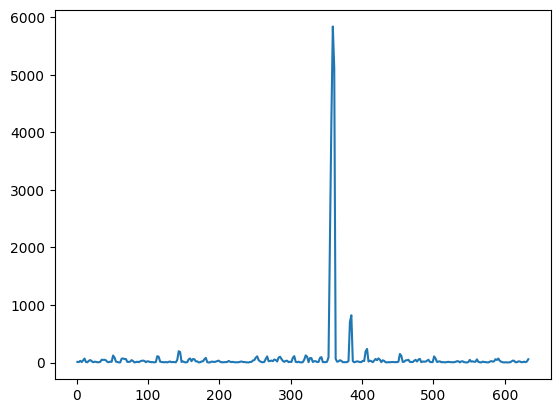

In [242]:
plt.plot(df1.time,df1['LL_0.78'])